In [1]:
# !pip install pysindy

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import pysindy as ps

path = r"data/"
df0 = pd.read_csv(path + 'pressure.csv', index_col=False, header=None)

df1 = pd.read_csv(path + 'water_holdup.csv', index_col=False, header=None)

df2 = pd.read_csv(path + 'water_velocity.csv', index_col=False, header=None)

df3 = pd.read_csv(path + 'gas_holdup.csv', index_col=False, header=None)

df4 = pd.read_csv(path + 'gas_velocity.csv', index_col=False, header=None)

df5 = pd.read_csv(path + 'x.csv', index_col=False, header=None)

df6 = pd.read_csv(path + 't.csv', index_col=False, header=None)

t_start = 0 

x_end = 57

x = df5.iloc[:x_end,0].to_numpy()

t = df6.iloc[t_start:,0].T.to_numpy()
pressure = df0.iloc[t_start:,:x_end].to_numpy().T

water_holdup = df1.iloc[t_start:,:x_end].to_numpy().T

water_velocity = df2.iloc[t_start:,:x_end].to_numpy().T

gas_holdup = df3.iloc[t_start:,:x_end].to_numpy().T

gas_velocity = df4.iloc[t_start:,:x_end].to_numpy().T

L = x[-1] # length of spatial domain
N = len(x) # number of spatial points in [0,L]

T = t[-1] # total time
Nt = len(t) # number of temporal points in [0,T]
#Input data

print(f"Shape of the data \nwater_holdup: {water_holdup.shape}\nShape of water_velocity: {water_velocity.shape}\nShape of gas_holdup: {gas_holdup.shape}\nShape of gas_velocity: {gas_velocity.shape}\n")

/home/arofenitra/ai/lib/python3.12/site-packages/pysindy/__init__.py:1: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import DistributionNotFound


Shape of the data 
water_holdup: (57, 1313)
Shape of water_velocity: (57, 1313)
Shape of gas_holdup: (57, 1313)
Shape of gas_velocity: (57, 1313)



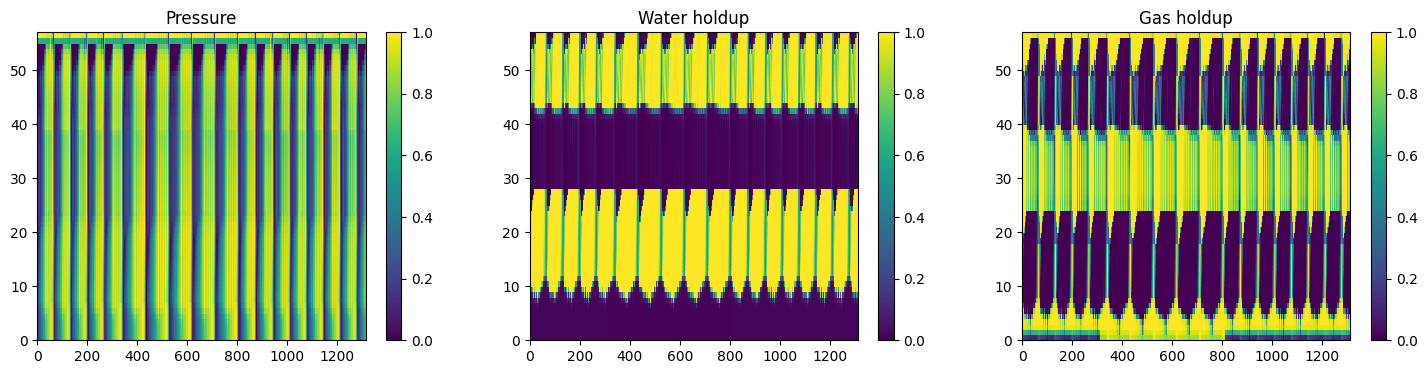

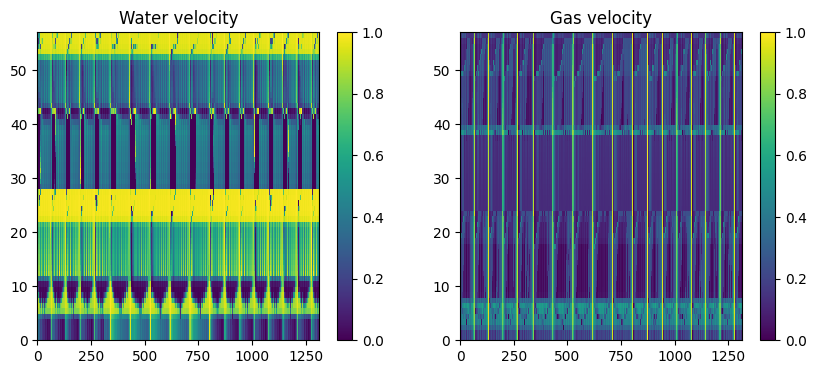

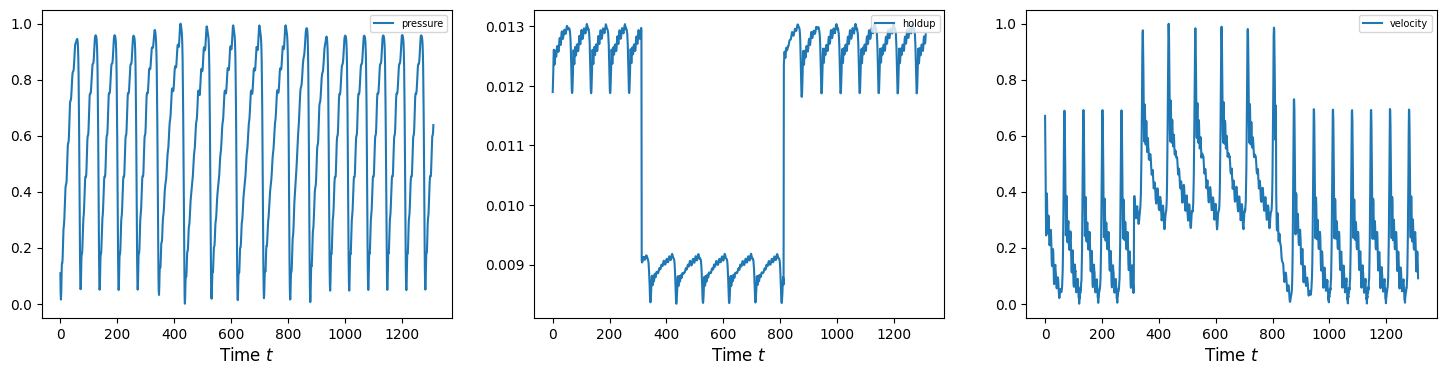

In [2]:
plt.figure(figsize=(18,4))

plt.subplot(1, 3, 1)
plt.title("Pressure")
plt.pcolor(pressure)
plt.colorbar()

plt.subplot(1, 3, 2)
plt.title("Water holdup")
plt.pcolor(water_holdup)
plt.colorbar()

plt.subplot(1, 3, 3)
plt.title("Gas holdup")
plt.pcolor(gas_holdup)
plt.colorbar()
plt.show()

#Output data

plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1)

plt.subplot(1, 2, 1)
plt.title("Water velocity")
plt.pcolor(water_velocity)
plt.colorbar()

plt.subplot(1, 2, 2)
plt.title("Gas velocity")
plt.pcolor(gas_velocity)
plt.colorbar()
plt.show()

x_location = 0

plt.figure(figsize=(18,4))

plt.subplot(1, 3, 1)
plt.plot(pressure.T[:,x_location],'-',label='pressure')
plt.xlabel('Time $t$', fontsize=12)
plt.legend(loc = 1, fontsize = 7)

plt.subplot(1, 3, 2)
plt.plot(water_holdup.T[:,x_location],'-',label='holdup')
plt.xlabel('Time $t$', fontsize=12)
plt.legend(loc = 1, fontsize = 7)

plt.subplot(1, 3, 3)
plt.plot(water_velocity.T[:,x_location],'-',label='velocity')
plt.xlabel('Time $t$', fontsize=12)
plt.legend(loc = 1, fontsize = 7)

plt.show()

In [3]:
T = len(t)
T_train = int(T/2)
T_val = int(T/4)
T_test = int(T)-T_train-T_val
print(f"T = {T}")
print(f"T_train = {T_train}")
print(f"T_val = {T_val}")
print(f"T_test = {T_test}")

print(f"Shape of pressure = {pressure.shape}")
print(f"Shape of water_holdup = {water_holdup.shape}")
print(f"Shape of gas_holdup = {gas_holdup.shape}")
print(f"Shape of water_velocity = {water_velocity.shape}")
print(f"Shape of gas_velocity = {gas_velocity.shape}\n\n")

matrix_X = np.vstack((water_velocity, gas_velocity))
matrix_Y = np.vstack((pressure, water_holdup, gas_holdup))

print(f"Shape of matrix_X = {matrix_X.shape}")
print(f"Shape of matrix_Y = {matrix_Y.shape}\n\n")
X_train = matrix_X[:,:T_train]
Y_train = matrix_Y[:,:T_train]


X2_train = X_train[:, 1:]
X1_train = X_train[:, :-1]

print(f"Shape of X1_train = {X1_train.shape}")
print(f"Shape of X2_train = {X2_train.shape}")
print(f"Shape of Y_train = {Y_train.shape}")
X = X1_train
U = Y_train[:, :-1]
X_prime = X2_train
X_test = matrix_X[:,T_train:]
Y_test = matrix_Y[:,T_train:]

print(f"X shape: {X.shape}")
print(f"U shape: {U.shape}")
print(f"X_prime shape: {X_prime.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"Y_test shape: {Y_test.shape}")

T = 1313
T_train = 656
T_val = 328
T_test = 329
Shape of pressure = (57, 1313)
Shape of water_holdup = (57, 1313)
Shape of gas_holdup = (57, 1313)
Shape of water_velocity = (57, 1313)
Shape of gas_velocity = (57, 1313)


Shape of matrix_X = (114, 1313)
Shape of matrix_Y = (171, 1313)


Shape of X1_train = (114, 655)
Shape of X2_train = (114, 655)
Shape of Y_train = (171, 656)
X shape: (114, 655)
U shape: (171, 655)
X_prime shape: (114, 655)
X_test shape: (114, 657)
Y_test shape: (171, 657)


In [4]:
import numpy as np
X1_train = np.array(X1_train)
X2_train = np.array(X2_train)
Y_train = np.array(Y_train)


print(f"Shape of X: {X.shape}\nShape of X_prime: {X_prime.shape}\nShape of U: {U.shape}")


Shape of X: (114, 655)
Shape of X_prime: (114, 655)
Shape of U: (171, 655)


In [6]:



# def dmdc(X, U, X_prime, rank=None, p_rank=None):
#     """
#     Compute A and B matrices using DMD with control (DMDc)
#     X_prime = A*X + B*U
#     X_prime = [A; B]@[[X];[U]]
#     :param X: State snapshots at time k, shape (n, m)
#     :param U: Control inputs at time k, shape (r, m)
#     :param X_prime: State snapshots at time k+1, shape (n, m)
#     :param rank: Rank for truncated SVD (optional)
#     :return: Estimated A and B matrices
#     """
#     n, m = X.shape
#     r = U.shape[0]

#     # 1. Build augmented data matrix Z
#     Z = np.vstack([X, U])  # shape (n + r, m)

#     # 2. Perform SVD on Z
#     U_z, Sigma_z, Vh_z = np.linalg.svd(Z, full_matrices=False)
#     U_z = U_z.astype(np.complex128)
#     Sigma_z = Sigma_z.astype(np.complex128)
#     Vh_z = Vh_z.astype(np.complex128)
#     U_r, Sigma_r, Vh_r = np.linalg.svd(X_prime, full_matrices=False)
#     U_r = U_r.astype(np.complex128)
#     Sigma_r = Sigma_r.astype(np.complex128)
#     Vh_r = Vh_r.astype(np.complex128)
#     # Truncate if rank is specified
#     if rank is not None:
#         U_r = U_r[:, :rank]
#         Sigma_r = Sigma_r[:rank]
#         Vh_r = Vh_r[:rank, :]
#     if p_rank is not None:
#         U_z = U_z[:, :rank]
#         Sigma_z = Sigma_z[:rank]
#         Vh_z = Vh_z[:rank, :]

#     U1_z = U_z[:n, :]
#     U2_z = U_z[n:, :]
#     S_z_inv = np.diag(1 / Sigma_z)
#     A_pinv = V_z @ S_z_inv @ U1_z.T
#     B_pinv = V_z @ S_z_inv @ U2_z.T
#     A = X_prime @ A_pinv
#     B = X_prime @ B_pinv
#     return {"U_z": U_z, "Sigma_z": Sigma_z, "Vh_z": Vh_z, "U_r": U_r, "Sigma_r": Sigma_r, "Vh_r": Vh_r, "A": A, "B": B, "A_pinv": A_pinv, "B_pinv": B_pinv, "U1_z": U1_z, "U2_z": U2_z, "S_z_inv": S_z_inv, "X_prime": X_prime, "X": X, "U": U, "t": t, "n": n, "m": m, "rank": rank, "p_rank": p_rank}

# def predict(matrix_X, matrix_Y):
    

In [6]:
import numpy as np
import matplotlib.pyplot as plt

class DMDc:
    def __init__(self, rank=None, p_rank=None, t=None):
        self.rank = rank
        self.p_rank = p_rank
        self.t = t
        self.dt = t[1:] - t[:-1]

        # Data matrices
        self.X = None
        self.U = None
        self.X_prime = None

        # Learned matrices
        self.A = None
        self.B = None
        self.A_tilde = None
        self.B_tilde = None

        # DMD components
        self.modes = None
        self.eigs = None
        self.omega = None
        self.dynamics = None

        # SVD components
        self.U_r = None
        self.S_r = None
        self.V_r = None
        self.U_z = None
        self.S_z = None
        self.V_z = None
        self.U1_z = None
        self.U2_z = None

    def fit(self, X, U, X_prime):
        self.X = X
        self.U = U
        self.X_prime = X_prime
        n, m = X.shape
        r = U.shape[0]

        Z = np.vstack([X, U])

        U_z_full, S_z_full, Vh_z_full = np.linalg.svd(Z, full_matrices=False)
        V_z_full = Vh_z_full.T.conj()

        if self.p_rank is not None:
            self.U_z = U_z_full[:, :self.p_rank].astype(np.complex128)
            self.S_z = S_z_full[:self.p_rank].astype(np.complex128)
            self.V_z = V_z_full[:, :self.p_rank].astype(np.complex128)
        else:
            self.U_z = U_z_full.astype(np.complex128)
            self.S_z = S_z_full.astype(np.complex128)
            self.V_z = V_z_full.astype(np.complex128)

        self.U1_z = self.U_z[:n, :]
        self.U2_z = self.U_z[n:, :]

        U_r_full, S_r_full, Vh_r_full = np.linalg.svd(X, full_matrices=False)
        V_r_full = Vh_r_full.T.conj()

        if self.rank is not None:
            self.U_r = U_r_full[:, :self.rank].astype(np.complex128)
            self.S_r = S_r_full[:self.rank].astype(np.complex128)
            self.V_r = V_r_full[:, :self.rank].astype(np.complex128)
        else:
            self.U_r = U_r_full.astype(np.complex128)
            self.S_r = S_r_full.astype(np.complex128)
            self.V_r = V_r_full.astype(np.complex128)

        S_z_inv = np.diag(1 / self.S_z)

        A_pinv = self.V_z @ S_z_inv @ self.U1_z.T.conj()
        B_pinv = self.V_z @ S_z_inv @ self.U2_z.T.conj()

        self.A = self.X_prime @ A_pinv
        self.B = self.X_prime @ B_pinv

        self.A_tilde = self.U_r.T.conj() @ self.A @ self.U_r
        self.B_tilde = self.U_r.T.conj() @ self.B

        self.eigs, self.W = np.linalg.eig(self.A_tilde)

        self.modes = self.X_prime @ self.V_z @ S_z_inv @ self.U1_z.T.conj() @ self.U_r @ self.W
        self.modes /= (np.linalg.norm(self.modes, axis=0, keepdims=True) + 1e-12)

        mean_dt = np.mean(self.dt)
        self.omega = np.log(self.eigs) / mean_dt
        self.x_initial = self.X[:, 0]
        self.x_initial_tilde = self.U_r.T.conj() @ self.x_initial

        return self
    def get_A_B(self):
        return self.A, self.B
    
    def predict(self, X, U):
        if self.A is None or self.B is None:
            raise ValueError("Model has not been fitted yet.")

        return self.A @ X + self.B @ U

    def predict_reduced(self, x_tilde, u):
        if self.A_tilde is None or self.B_tilde is None:
            raise ValueError("Model has not been fitted yet.")
        return self.A_tilde @ x_tilde + self.B_tilde @ u
    

    def project_to_reduced(self, X):
        if self.U_r is None:
            raise ValueError("Model has not been fitted yet.")

        return self.U_r.T.conj() @ X

    def reconstruct_from_reduced(self, x_tilde):
        if self.U_r is None:
            raise ValueError("Model has not been fitted yet.")

        return self.U_r @ x_tilde

    def reconstruct_exact(self, X0, U):
        """
        Reconstructs the system without using x_{k+1} = A x_k + B u_k.
        
        Args:
            X0: Initial state (n,)
            U: Control inputs (r, m), where m is the number of time steps.
        
        Returns:
            X_reconstructed: (n, m+1) reconstructed states
        """
        if self.modes is None or self.eigs is None:
            raise ValueError("Fit the model first.")
        
        n = self.modes.shape[0]
        r = len(self.eigs)
        m = U.shape[1]
        
        # Compute Phi^\dagger (pseudoinverse of DMD modes)
        Phi_pinv = np.linalg.pinv(self.modes)
        
        # Compute B_tilde in full space (B = Phi B_tilde)
        B_full = self.modes @ self.B_tilde
        
        # Initialize reconstructed states
        X_reconstructed = np.zeros((n, m + 1), dtype=np.complex128)
        X_reconstructed[:, 0] = X0
        
        # Compute for each time step
        for k in range(1, m + 1):
            # Homogeneous solution (modes * eigs^k * initial coefficients)
            w_k = np.log(self.eigs) * k
            x_hom = self.modes @ np.diag(np.exp(w_k)) @ Phi_pinv @ X0
            
            # Particular solution (response to inputs)
            x_part = np.zeros(n, dtype=np.complex128)
            for i in range(k):
                x_part += self.modes @ np.diag(self.eigs ** (k - 1 - i)) @ Phi_pinv @ B_full @ U[:, i]
            
            X_reconstructed[:, k] = x_hom + x_part
        
        return X_reconstructed.real  # Return real part if data is real
    def get_X_from_U(self, U):
        if self.A is None or self.B is None:
            raise ValueError("Model has not been fitted yet.")
        return (self.U1_z @ (np.linalg.pinv(self.U2_z)@U)).real

    def simulate_future(self, x0, u_future, n_steps):
        if self.A is None or self.B is None:
            raise ValueError("Model has not been fitted yet.")

        n = x0.shape[0]
        X_future = np.zeros((n, n_steps + 1), dtype=np.complex128)
        X_future[:, 0] = x0

        for k in range(n_steps):
            X_future[:, k + 1] = self.A @ X_future[:, k] + self.B @ u_future[:, k]

        return X_future
    def get_params(self):
        results = {
            'A': self.A,
            'B': self.B,
            'X': self.X,
            'U': self.U,
            
            'U1_z': self.U1_z,
            'U2_z': self.U2_z,
            
            'U_r': self.U_r,
            'V_r': self.V_r,
            'S_r': self.S_r,
            'A_tilde': self.A_tilde,
            'Phi': self.modes,
            "W" : self.W,
            "omega" : self.omega,
            "eigs": self.eigs,
            "t": self.t,
            "dt": self.dt,
            "rank": self.rank,
        }
        return results

    def simulate_future_closed_form(self, x0, u_future):
        if self.A is None or self.B is None:
            raise ValueError("Model has not been fitted yet.")

        n_steps = u_future.shape[1]
        n = x0.shape[0]
        X_future = np.zeros((n, n_steps + 1), dtype=np.complex128)
        X_future[:, 0] = x0

        for k in range(n_steps):
            X_future[:, k + 1] = np.linalg.matrix_power(self.A, k + 1) @ x0 + np.sum(
                [np.linalg.matrix_power(self.A, k - i) @ self.B @ u_future[:, i] for i in range(k + 1)], axis=0)

        return X_future

    def plot_modes(self, num_modes=2):
        if self.modes is None:
            raise ValueError("Modes not computed yet.")

        num_modes = min(num_modes, self.modes.shape[1])
        fig, axes = plt.subplots(2, 3, figsize=(15, 10))
        axes = axes.flatten()

        for i in range(num_modes):
            axes[i].plot(self.modes[:, i].real, label='Real', alpha=0.7)
            axes[i].plot(self.modes[:, i].imag, label='Imag', alpha=0.7)
            axes[i].set_title(f"Mode {i + 1}")
            axes[i].legend()
            axes[i].grid(True)

        plt.tight_layout()
        plt.show()

    def plot_dynamics(self, num_modes=6):
        if self.dynamics is None:
            self.compute_dynamics()

        num_modes = min(num_modes, self.dynamics.shape[0])
        plt.figure(figsize=(12, 6))

        for i in range(num_modes):
            plt.subplot(2, 1, 1)
            plt.plot(self.dynamics[i, :].real, label=f"Mode {i + 1}")
            plt.title("Mode Dynamics (Real)")
            plt.legend()
            plt.grid(True)
            plt.yscale("log")

            plt.subplot(2, 1, 2)
            plt.plot(self.dynamics[i, :].imag, label=f"Mode {i + 1}")
            plt.title("Mode Dynamics (Imaginary)")
            plt.legend()
            plt.grid(True)
            plt.yscale("log")

        plt.tight_layout()
        plt.show()

    def plot_eigenvalues(self):
        if self.eigs is None:
            raise ValueError("Eigenvalues not computed yet.")

        plt.figure(figsize=(8, 8))
        plt.scatter(self.eigs.real, self.eigs.imag, marker='x', s=100, alpha=0.7)

        theta = np.linspace(0, 2 * np.pi, 100)
        plt.plot(np.cos(theta), np.sin(theta), 'k--', alpha=0.5, label='Unit Circle')

        plt.axhline(0, color='black', lw=0.5)
        plt.axvline(0, color='black', lw=0.5)
        plt.xlabel('Real')
        plt.ylabel('Imaginary')
        plt.title('Eigenvalues in Complex Plane')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.axis('equal')
        plt.show()

    def plot_svd(self):
        if self.S_r is None or self.S_z is None:
            raise ValueError("Singular values not computed yet.")

        plt.figure(figsize=(12, 5))

        plt.subplot(1, 2, 1)
        plt.semilogy(self.S_r, 'o-', alpha=0.7)
        plt.title('Singular Values of X')
        plt.xlabel('Index')
        plt.ylabel('Singular Value')
        plt.grid(True)

        plt.subplot(1, 2, 2)
        plt.semilogy(self.S_z, 's-', alpha=0.7, color='red')
        plt.title('Singular Values of Augmented Z')
        plt.xlabel('Index')
        plt.ylabel('Singular Value')
        plt.grid(True)

        plt.tight_layout()
        plt.show()

    def plot_reconstruction(self, idx=0):
        X_recon = self.reconstruct()

        plt.figure(figsize=(12, 6))
        plt.plot(self.X[idx, :], 'o-', label="Original", alpha=0.7, markersize=1)
        plt.plot(X_recon[idx, :], 's--', label="Reconstructed", alpha=0.7, markersize=1)
        plt.title(f"State Comparison (Feature {idx})")
        plt.xlabel('Time Step')
        plt.ylabel('State Value')
        plt.legend()
        plt.grid(True)
        plt.show()

        error = np.abs(self.X[idx, :] - X_recon[idx, :])
        plt.figure(figsize=(10, 4))
        plt.plot(error, 'r-', alpha=0.7)
        plt.title(f"Reconstruction Error (Feature {idx})")
        plt.xlabel('Time Step')
        plt.ylabel('Absolute Error')
        plt.grid(True)
        plt.show()


In [7]:
dmdc = DMDc(rank=100, p_rank=400, t=t[:T_train])  
dmdc.fit(X, U, X_prime)
results = dmdc.get_params()
Phi = results["Phi"]
A = results["A"]
B = results["B"]
eigs = results["eigs"]
U1_z = results["U1_z"]
U2_z = results["U2_z"]
U_r = results["U_r"] 
# print("Relative prediction error:", dmdc.score())

In [8]:
# X_reconstructed = np.zeros(X.shape)
# X_reconstructed[:,0] = X[:,0]

# x0 = X[:,0]
# phi_inv = np.linalg.pinv(Phi)
# phi_inv_x0 = phi_inv @ x0
# sums_vec_x = x0
# for i in range(X.shape[1]-1):
#     vect = phi_inv_x0 + phi_inv@sums_vec_x
#     vect = np.diag(eigs**(i+1)) @ vect
#     vect = U2_z @ U_r.T.conj() @ vect
#     X_reconstructed[:,i+1] = Phi @ (np.diag(eigs**(i+1)) @ (phi_inv @x0 +  U2_z @ U_r.T.conj() @ sums_vec_x))
#     sums_vec_x+= X[:,i+1]
                                    
#     print(f"step{i}: Errors: {np.linalg.norm(X_reconstructed[:,:i+1]-X[:,:i+1])/np.linalg.norm(X[:,:i+1])}")

In [9]:

# Run DMDc with the corrected implementation
dmdc = DMDc(rank=100, p_rank=400, t=t[:T_train])  
dmdc.fit(X, U, X_prime)
A,B = dmdc.get_A_B()
X_reconstructed = dmdc.reconstruct_exact(X[:,0],U)
print(X.shape)
print(X_reconstructed.shape)
# # Evaluate
# print("Relative prediction error:", dmdc.score())
print(f"Errors: {np.linalg.norm(X_reconstructed[:,:-1]-matrix_X[:,1:])/np.linalg.norm(matrix_X[:,1:])}")
# # Visualize results
# dmdc.plot_modes(num_modes=6)
# dmdc.plot_eigenvalues()
# dmdc.plot_svd()
# dmdc.plot_dynamics()
# dmdc.predict(matrix_X,matrix_Y)

# dmdc.plot_reconstruction(idx=0)
# Take first test state as initial condition

x0 = X_test[:]

# Predict for len(X_test.T) - 1 steps
n_steps = X_test.shape[1] - 1

# Simulate future states
# X_simulated = dmdc.simulate_future(x0=x0, u_future=Y_test, n_steps=n_steps)

/tmp/ipykernel_3694821/567793991.py:160: RuntimeWarning: invalid value encountered in matmul
  x_part += self.modes @ np.diag(self.eigs ** (k - 1 - i)) @ Phi_pinv @ B_full @ U[:, i]
/tmp/ipykernel_3694821/567793991.py:160: RuntimeWarning: overflow encountered in matmul
  x_part += self.modes @ np.diag(self.eigs ** (k - 1 - i)) @ Phi_pinv @ B_full @ U[:, i]
/tmp/ipykernel_3694821/567793991.py:155: RuntimeWarning: overflow encountered in matmul
  x_hom = self.modes @ np.diag(np.exp(w_k)) @ Phi_pinv @ X0
/tmp/ipykernel_3694821/567793991.py:155: RuntimeWarning: invalid value encountered in matmul
  x_hom = self.modes @ np.diag(np.exp(w_k)) @ Phi_pinv @ X0
/tmp/ipykernel_3694821/567793991.py:155: RuntimeWarning: overflow encountered in exp
  x_hom = self.modes @ np.diag(np.exp(w_k)) @ Phi_pinv @ X0
/tmp/ipykernel_3694821/567793991.py:160: RuntimeWarning: overflow encountered in power
  x_part += self.modes @ np.diag(self.eigs ** (k - 1 - i)) @ Phi_pinv @ B_full @ U[:, i]


(114, 655)
(114, 656)


ValueError: operands could not be broadcast together with shapes (114,655) (114,1312) 

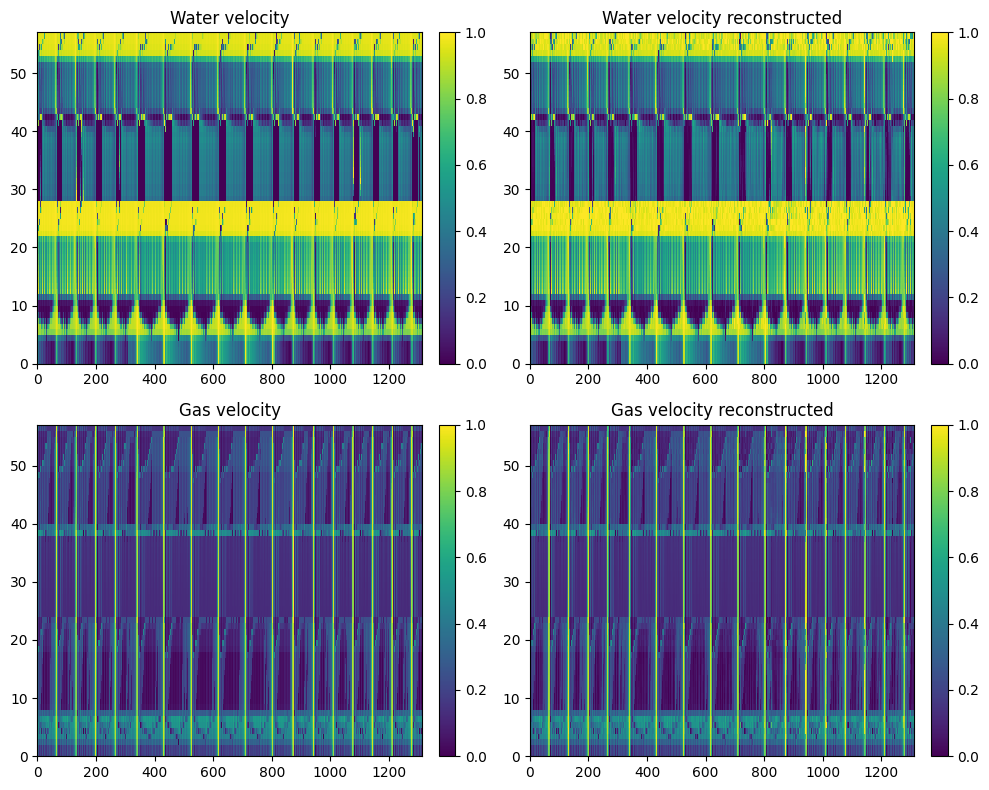

In [58]:
# plt.figure(figsize=(18,4))

# plt.subplot(1, 3, 1)
# plt.title("Pressure")
# plt.pcolor(pressure)
# plt.colorbar()

# plt.subplot(1, 3, 2)
# plt.title("Water holdup")
# plt.pcolor(water_holdup)
# plt.colorbar()

# plt.subplot(1, 3, 3)
# plt.title("Gas holdup")
# plt.pcolor(gas_holdup)
# plt.colorbar()
# plt.show()

#Output data


fig, axes = plt.subplots(2, 2, figsize=(10, 8))  # Adjust overall figure size if needed

# First plot - Water velocity
im0 = axes[0, 0].pcolor(matrix_X[:57, 1:])
axes[0, 0].set_title("Water velocity")
cbar0 = plt.colorbar(im0, ax=axes[0, 0], fraction=0.046, pad=0.04)  # Adjust fraction & pad

# Second plot - Water velocity reconstructed
im1 = axes[0, 1].pcolor(X_reconstructed[:57, :-1])
axes[0, 1].set_title("Water velocity reconstructed")
cbar1 = plt.colorbar(im1, ax=axes[0, 1], fraction=0.046, pad=0.04)
im1.set_clim(0, 1)  # Set color limits

# Third plot - Gas velocity
im2 = axes[1, 0].pcolor(matrix_X[57:, 1:])
axes[1, 0].set_title("Gas velocity")
cbar2 = plt.colorbar(im2, ax=axes[1, 0], fraction=0.046, pad=0.04)

# Fourth plot - Gas velocity reconstructed
im3 = axes[1, 1].pcolor(X_reconstructed[57:, :-1])
axes[1, 1].set_title("Gas velocity reconstructed")
cbar3 = plt.colorbar(im3, ax=axes[1, 1], fraction=0.046, pad=0.04)
im3.set_clim(0, 1)  # Set color limits

plt.tight_layout()  # Prevent overlapping
plt.show()


# x_location = 0

# plt.figure(figsize=(18,4))

# plt.subplot(1, 3, 1)
# plt.plot(pressure.T[:,x_location],'-',label='pressure')
# plt.xlabel('Time $t$', fontsize=12)
# plt.legend(loc = 1, fontsize = 7)

# plt.subplot(1, 3, 2)
# plt.plot(water_holdup.T[:,x_location],'-',label='holdup')
# plt.xlabel('Time $t$', fontsize=12)
# plt.legend(loc = 1, fontsize = 7)

# plt.subplot(1, 3, 3)
# plt.plot(water_velocity.T[:,x_location],'-',label='velocity')
# plt.xlabel('Time $t$', fontsize=12)
# plt.legend(loc = 1, fontsize = 7)

# plt.show()

In [ ]:
# import numpy as np
# from pydmd import DMDc

# def delay_embed(data, d):
#     """
#     Delay embedding: from [x_t] to [x_t, x_{t-1}, ..., x_{t-d+1}]
#     Input: data shape = (n_time, n_space)
#     Output: X_delayed shape = (n_time - d + 1, n_space * d)
#     """
#     N = data.shape[0]
#     return np.hstack([data[i:N-d+i+1] for i in range(d)])

# def hodmd_with_control(u, v, x, y, z, d=3):
#     """
#     HODMD-like model with control inputs (DMDc)
#     u, v: unobservable velocity fields (shape: time x space)
#     x, y, z: observable pressure and holdups
#     d: delay embedding dimension
#     """
#     # Combine unobservables
#     uv = np.hstack([u, v])  # shape: T x (2*N)

#     # Delay embedding of unobservables
#     X = delay_embed(uv, d)  # shape: (T-d+1) x (2*N*d)

#     # Combine observables
#     obs = np.hstack([x, y, z])  # shape: T x (3*N)

#     # Delay embedding of observables (as control input)
#     U = delay_embed(obs, d)  # shape: (T-d+1) x (3*N*d)

#     # Future state (next step of unobservables)
#     X_prime = uv[d:]  # shape: (T-d+1) x (2*N)
#      # Debugging: Print shapes
#     print("Shape of X:", X.shape)
#     print("Shape of X_prime:", X_prime.shape)
#     print("Shape of U:", U.shape)
#     # Fit DMDc
#     dmdc = DMDc(svd_rank=50, opt=True)
#     dmdc.fit(X, X_prime, U)

#     return dmdc, X, U, X_prime
# # Assume you already loaded all data as above
# # Shape: (N_spatial=57, N_time=1313)

# # Transpose to get (time, space)
# water_velocity = water_velocity.T  # u_k
# gas_velocity = gas_velocity.T      # v_k
# pressure = pressure.T              # x_k
# water_holdup = water_holdup.T      # y_k
# gas_holdup = gas_holdup.T          # z_k

# # Choose delay value
# d = 5  # Try with 5, can be tuned

# # Build and fit model
# model, X, U, X_prime = hodmd_with_control(
#     water_velocity,
#     gas_velocity,
#     pressure,
#     water_holdup,
#     gas_holdup,
#     d=d
# )

In [7]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
data_plot_x = []
data_plot_y = []

# Example data
# d = 2  # depth of the lag
n = 1000  # number of data points
for d in range(1,n-1):
    x = np.linspace(-2,-1,n)
    y = np.linspace(-1,0,n)
    z = np.linspace(0,1,n)
    t = np.linspace(1,2,n)

    # Prepare the design matrix X and target matrix Y
    X = []
    Y = []

    for k in range(d, n):
        # Past values for x, y, z, t
        past_x = x[k-d:k][::-1]
        past_y = y[k-d:k][::-1]
        past_z = z[k-d:k][::-1]
        past_t = t[k-d:k][::-1]
        

        # Create a row in the design matrix
        row = np.concatenate([past_x, past_y, past_z, past_t])
        X.append(row)

        # Target values
        Y.append([x[k], y[k]])

    X = np.array(X)
    Y = np.array(Y)
    # Fit the linear regression model
    model = LinearRegression()
    model.fit(X, Y)

    # Extract the coefficients
    coefficients = model.coef_

    # Reshape coefficients to get A_j and B_j matrices
    A_j = coefficients[:, :2*d].reshape(d, 2, 2)
    B_j = coefficients[:, 2*d:].reshape(d, 2, 2)

    # print("A_j matrices:\n", A_j)
    # print("B_j matrices:\n", B_j)


    Y_pred = model.predict(X)
    
    # Calculate the Mean Squared Error
    mse = mean_squared_error(Y, Y_pred)
    data_plot_x.append(d)
    data_plot_y.append(mse)
    print(f"d: {d}, Mean Squared Error: {mse}")


d: 1, Mean Squared Error: 4.0340038939253285e-32
d: 2, Mean Squared Error: 1.5622379512217978e-31
d: 3, Mean Squared Error: 1.3145350805372368e-31
d: 4, Mean Squared Error: 1.0424501893562502e-31
d: 5, Mean Squared Error: 7.591028680702487e-32
d: 6, Mean Squared Error: 8.21670691243422e-32
d: 7, Mean Squared Error: 5.867123502082629e-32
d: 8, Mean Squared Error: 1.8934920033481008e-31
d: 9, Mean Squared Error: 3.161082650477018e-31
d: 10, Mean Squared Error: 1.4201573963857614e-31
d: 11, Mean Squared Error: 4.138432032976722e-32
d: 12, Mean Squared Error: 5.867536609112708e-32
d: 13, Mean Squared Error: 6.734198448097837e-32
d: 14, Mean Squared Error: 1.0701685615118218e-31
d: 15, Mean Squared Error: 5.317678326041704e-32
d: 16, Mean Squared Error: 1.8069450529449708e-31
d: 17, Mean Squared Error: 1.757122086799846e-32
d: 18, Mean Squared Error: 3.669504526015689e-32
d: 19, Mean Squared Error: 6.277746326166452e-32
d: 20, Mean Squared Error: 7.540605302667167e-32
d: 21, Mean Squared Er

In [7]:
import matplotlib.pyplot as plt 
plt.plot(data_plot_x,data_plot_y,"o",markersize=1)
plt.yscale("log")

NameError: name 'data_plot_x' is not defined

Shape of X_train is : (2, 200)
Shape of Y_train is : (1, 200)
Shape of X_dmdc (chi_k) is : (100, 150)
Shape of X_prime_dmdc (chi_k_plus_1) is : (100, 150)
Shape of U_dmdc (u_k) is : (1, 150)
Shape of A: (100, 100)
Shape of B: (100, 1)
Shape of reconstructed original states: (2, 200)


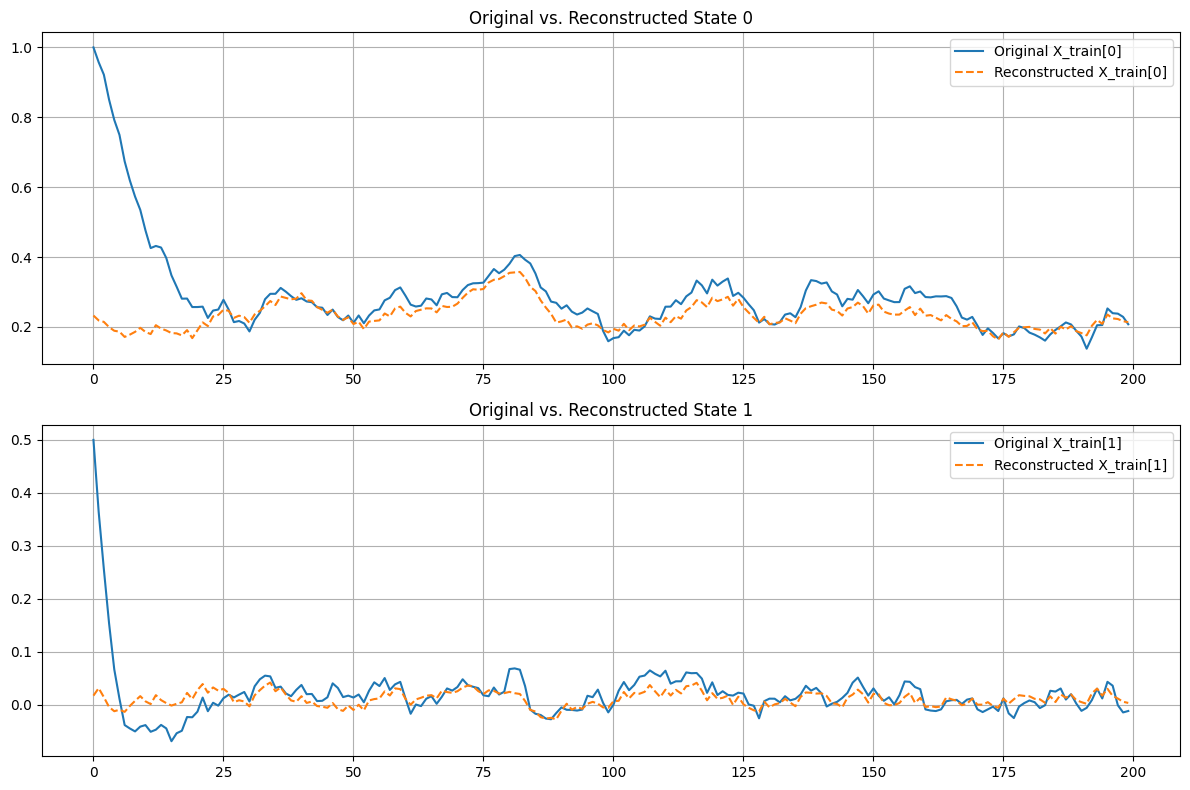

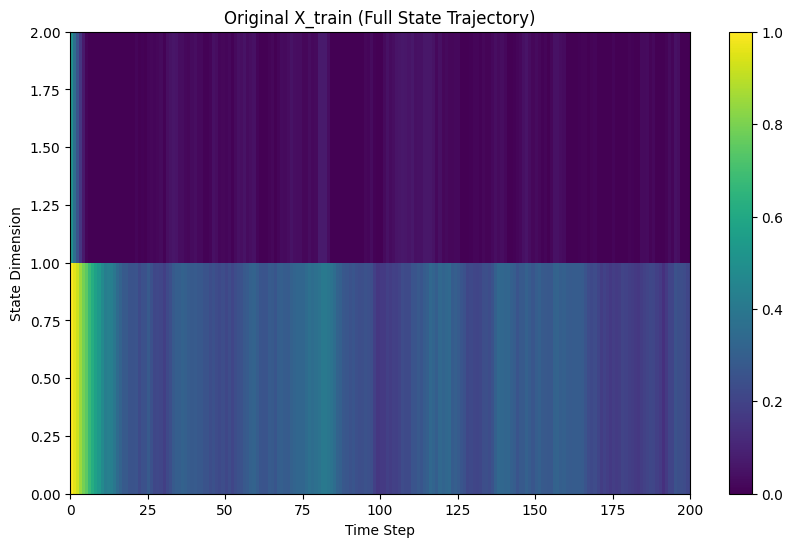

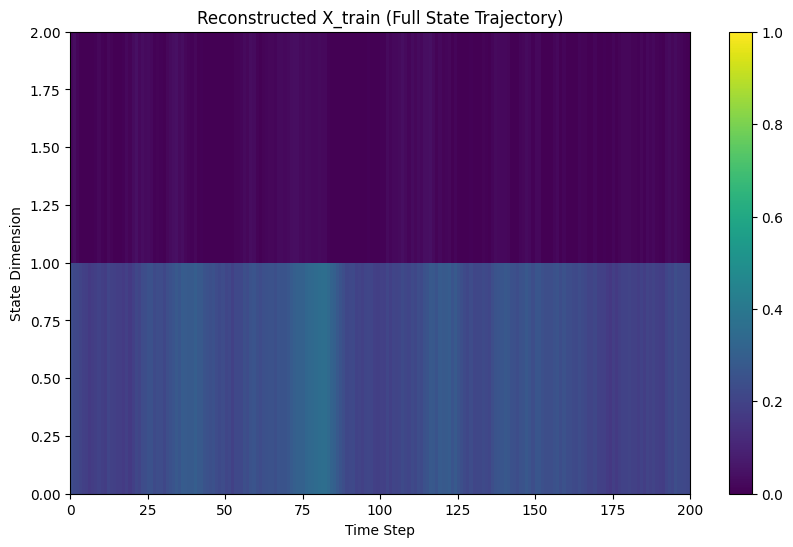

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt

# # Dummy data for demonstration purposes
# # In your actual code, X_train and Y_train would be loaded from your data.
# # Ensure X_train is (n_features, n_snapshots) and Y_train is (n_inputs, n_snapshots)
# np.random.seed(42)
# T_total = 200 # Total time steps
# n_states = 2  # Number of states
# n_inputs = 1  # Number of inputs
# d = 50        # Delay

# # Simulate a simple system for demonstration
# X_train = np.zeros((n_states, T_total))
# Y_train = np.zeros((n_inputs, T_total))

# # Simple linear system with control input
# A_true = np.array([[0.9, 0.1], [-0.05, 0.8]])
# B_true = np.array([[0.5], [0.3]])

# X_train[:, 0] = [1.0, 0.5] # Initial state

# for t in range(T_total - 1):
#     Y_train[:, t] = np.random.rand(n_inputs) * 0.1 # Random input
#     X_train[:, t+1] = A_true @ X_train[:, t] + B_true @ Y_train[:, t] + np.random.randn(n_states) * 0.01

# T_train = X_train.shape[1] # Number of snapshots in X_train

# def create_delay_embedding(data, delay, start_idx, end_idx):
#     """
#     Creates a delay embedding of the data.
#     data: (n_features, n_snapshots)
#     delay: number of delay coordinates (d in chi_k = [x_k, x_{k-1}, ..., x_{k-d+1}])
#     start_idx: starting index for the last snapshot in the embedding
#     end_idx: ending index (exclusive) for the last snapshot in the embedding
    
#     Returns: (n_features * delay, number_of_embedded_snapshots)
#     """
#     n_features = data.shape[0]
#     num_snapshots = end_idx - start_idx
    
#     if num_snapshots <= 0:
#         return np.array([]) # Return empty array if no snapshots to embed

#     embedded_data = np.zeros((n_features * delay, num_snapshots))
    
#     for k in range(num_snapshots):
#         current_snapshot_idx = start_idx + k
#         if current_snapshot_idx < delay - 1: # Not enough history to form full embedding
#             raise ValueError(f"Not enough history for delay embedding at index {current_snapshot_idx}. Need at least {delay-1} previous snapshots.")

#         # Stack the current and d-1 previous snapshots
#         for j in range(delay):
#             if current_snapshot_idx - j < 0:
#                 # This should ideally not happen if start_idx is chosen correctly (>= delay-1)
#                 raise IndexError("Attempting to access negative index in delay embedding.")
#             embedded_data[j * n_features : (j + 1) * n_features, k] = data[:, current_snapshot_idx - j]
            
#     return embedded_data

# def dmdc(X_prime, X, U, rank_z=None):
#     """
#     Dynamic Mode Decomposition with Control (DMDc).
#     X_prime: (n_states_delay_embedded, num_snapshots_minus_delay) - chi_{k+1}
#     X: (n_states_delay_embedded, num_snapshots_minus_delay) - chi_k
#     U: (n_inputs, num_snapshots_minus_delay) - u_k
#     rank_z: Rank for the SVD of Z = [X; U]. If None, full rank is used.
    
#     Returns:
#     A: DMD matrix for the state evolution
#     B: Control input matrix
#     """
    
#     Z = np.vstack([X, U]).astype(np.complex128) # Z = [chi_k; u_k]
    
#     # SVD of Z
#     U_z, Sigma_z, Vt_z = np.linalg.svd(Z, full_matrices=False)
    
#     # Apply rank truncation if specified
#     if rank_z is not None:
#         U_z = U_z[:, :rank_z]
#         Sigma_z = Sigma_z[:rank_z]
#         Vt_z = Vt_z[:rank_z, :] # Vt_z is already transposed
    
#     Sinv_z = np.diag(1.0 / Sigma_z)
    
#     # Compute the pseudo-inverse of Z: Z_pinv = Vt_z.conj().T @ Sinv_z @ U_z.conj().T
#     # This is equivalent to V_z @ Sinv_z @ U_z.conj().T from your original code if V_z is Vt_z.conj().T
#     # Let's compute M = X_prime @ Z_pinv
#     M = X_prime @ Vt_z.conj().T @ Sinv_z @ U_z.conj().T

#     # The DMDc matrices A and B are extracted from M
#     # M = [A B]
#     n_embedded_states = X.shape[0] # Dimension of chi_k
    
#     A = M[:, :n_embedded_states]
#     B = M[:, n_embedded_states:]
    
#     return {"A": A.real, "B": B.real}


# def dmdc_reconstructed(X_initial_embedded, U_data, A, B, T_reconstruct):
#     """
#     Reconstructs the state trajectory using the learned DMDc model.
#     X_initial_embedded: The first delay-embedded state vector (n_states_delay_embedded, 1)
#                         This should be chi_{delay-1}
#     U_data: All control inputs for the reconstruction period (n_inputs, T_reconstruct)
#     A: Learned DMD matrix for state evolution
#     B: Learned control input matrix
#     T_reconstruct: Total number of time steps to reconstruct (should be <= U_data.shape[1])
    
#     Returns:
#     X_reconstructed_full: The full reconstructed delay-embedded states (n_states_delay_embedded, T_reconstruct)
#     X_reconstructed_first_state: Only the first state of the reconstructed embedding (n_states, T_reconstruct)
#     """
#     n_embedded_states = X_initial_embedded.shape[0]
#     n_states = n_embedded_states // d # Assuming 'd' is globally available or passed
    
#     X_reconstructed_full = np.zeros((n_embedded_states, T_reconstruct), dtype=np.complex128)
#     X_reconstructed_full[:, 0] = X_initial_embedded.flatten() # Set the initial embedded state
    
#     # To reconstruct the original state x_k (not chi_k)
#     X_reconstructed_first_state = np.zeros((n_states, T_reconstruct), dtype=np.complex128)
#     X_reconstructed_first_state[:, 0] = X_initial_embedded[:n_states].flatten()

#     for i in range(1, T_reconstruct):
#         if i >= U_data.shape[1]:
#             print(f"Warning: Not enough control inputs for full reconstruction. Stopping at step {i}.")
#             break
        
#         current_embedded_x = X_reconstructed_full[:, i-1].reshape(-1, 1)
#         current_u = U_data[:, i-1].reshape(-1, 1) # Use u_{k-1} for chi_k -> chi_{k+1}
        
#         # Predict the next embedded state: chi_{k+1} = A @ chi_k + B @ u_k
#         predicted_embedded_x_next = A @ current_embedded_x + B @ current_u
        
#         X_reconstructed_full[:, i] = predicted_embedded_x_next.flatten()
        
#         # The first 'n_states' rows of the predicted embedded state correspond to the predicted x_{k+1}
#         X_reconstructed_first_state[:, i] = predicted_embedded_x_next[:n_states].flatten()
        
#     return X_reconstructed_full.real, X_reconstructed_first_state.real


# # --- Main script execution ---

# print(f"Shape of X_train is : {X_train.shape}")
# print(f"Shape of Y_train is : {Y_train.shape}")

# # Define ranks
# rank_z = 20 # Example rank, adjust based on your system's complexity and singular values
# rank_r = None # Not used in this basic DMDc implementation

# # For delay embedding, the first 'd-1' time steps are used to form the first full embedded vector.
# # So, chi_{d-1} is formed from x_{d-1}, x_{d-2}, ..., x_0.
# # The data for DMDc will start from index 'd-1' for X and U.

# # X_prime will contain chi_{k+1} (from index d to T_total-1)
# # X will contain chi_k (from index d-1 to T_total-2)
# # U will contain u_k (from index d-1 to T_total-2)

# # First, let's create the full delay-embedded training data
# # This part is crucial for correctly setting up X and X_prime
# # We need to make sure we have enough data for the delay embedding
# # The maximum index we will access for X_train or Y_train is T_total - 1.
# # The minimum index for X_train or Y_train to form a full 'd' delay embedding ending at index 'k' is 'k - d + 1'.
# # So, to get chi_{k+1}, we need data up to x_{k+1}.
# # The loop for DMDc will go from k = d-1 to T_total - 2.
# # This means X_prime will have columns corresponding to chi_d, chi_{d+1}, ..., chi_{T_total-1}.
# # And X will have columns corresponding to chi_{d-1}, chi_d, ..., chi_{T_total-2}.

# # Let's adjust the indices for clarity:
# # We want to predict X_prime from X and U.
# # X_prime: [chi_d, chi_{d+1}, ..., chi_{T_train-1}]
# # X:       [chi_{d-1}, chi_d, ..., chi_{T_train-2}]
# # U_dmdc:  [u_{d-1}, u_d, ..., u_{T_train-2}]

# # Number of snapshots for DMDc matrices: (T_train - 1) - (d - 1) = T_train - d
# num_dmdc_snapshots = T_train - d

# if num_dmdc_snapshots <= 0:
#     raise ValueError("Not enough data to form delay embeddings. T_train must be greater than d.")

# # X_dmdc: delay embedding ending at k for k in [d-1, T_train-2]
# X_dmdc = create_delay_embedding(X_train, d, d - 1, T_train - 1) # Ends at T_train-2

# # X_prime_dmdc: delay embedding ending at k+1 for k in [d-1, T_train-2] (i.e., ending at k' in [d, T_train-1])
# X_prime_dmdc = create_delay_embedding(X_train, d, d, T_train) # Starts at X_train[:,d], ends at X_train[:,T_train-1]

# # U_dmdc: control inputs corresponding to X_dmdc
# U_dmdc = Y_train[:, d-1 : T_train-1]


# print(f"Shape of X_dmdc (chi_k) is : {X_dmdc.shape}")
# print(f"Shape of X_prime_dmdc (chi_k_plus_1) is : {X_prime_dmdc.shape}")
# print(f"Shape of U_dmdc (u_k) is : {U_dmdc.shape}")


# results = dmdc(X_prime_dmdc, X_dmdc, U_dmdc, rank_z)
# A = results["A"]
# B = results["B"]

# print(f"Shape of A: {A.shape}")
# print(f"Shape of B: {B.shape}")

# # --- Reconstruction ---
# # The reconstruction should start from the first full delay-embedded state available.
# # This is chi_{d-1}, which is the first column of X_dmdc.
# X_initial_embedded_for_reconstruction = X_dmdc[:, :1] # First column of X_dmdc

# # The U data for reconstruction should cover the entire reconstruction period.
# # Since we are reconstructing from time step '0' up to 'T_train-1',
# # and our model predicts chi_{k+1} from chi_k and u_k,
# # we need u_k for k from 0 to T_train-2.
# # So, U_data should be Y_train itself.
# # The dmdc_reconstructed function takes the full U_data for the reconstruction period,
# # and it handles indexing internally for u_k.
# U_reconstruction_data = Y_train # Use all available control inputs for reconstruction

# # Reconstruct for the entire T_train duration
# X_reconstructed_full_embedded, X_reconstructed_original_states = dmdc_reconstructed(
#     X_initial_embedded_for_reconstruction, U_reconstruction_data, A, B, T_train
# )

# print(f"Shape of reconstructed original states: {X_reconstructed_original_states.shape}")

# # Plotting (using the reconstructed original states)
# plt.figure(figsize=(12, 8))
# plt.subplot(2, 1, 1)
# plt.plot(X_train[0, :], label='Original X_train[0]')
# plt.plot(X_reconstructed_original_states[0, :], label='Reconstructed X_train[0]', linestyle='--')
# plt.title('Original vs. Reconstructed State 0')
# plt.legend()
# plt.grid(True)

# plt.subplot(2, 1, 2)
# plt.plot(X_train[1, :], label='Original X_train[1]')
# plt.plot(X_reconstructed_original_states[1, :], label='Reconstructed X_train[1]', linestyle='--')
# plt.title('Original vs. Reconstructed State 1')
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show()

# # Plot the whole original X_train and the reconstructed one as pcolor
# plt.figure(figsize=(10, 6))
# p = plt.pcolor(X_train, cmap='viridis', vmin=0, vmax=1)
# plt.colorbar(p)
# plt.title('Original X_train (Full State Trajectory)')
# plt.xlabel('Time Step')
# plt.ylabel('State Dimension')
# plt.show()

# plt.figure(figsize=(10, 6))
# p = plt.pcolor(X_reconstructed_original_states, cmap='viridis', vmin=0, vmax=1)
# plt.colorbar(p)
# plt.title('Reconstructed X_train (Full State Trajectory)')
# plt.xlabel('Time Step')
# plt.ylabel('State Dimension')
# plt.show()

Shape of X_train is : (114, 656)
Shape of X_prime is : (114, 654)


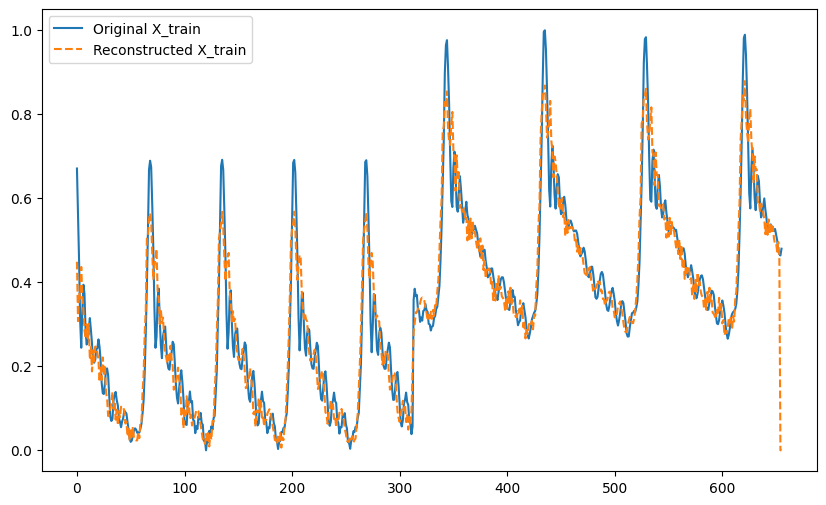

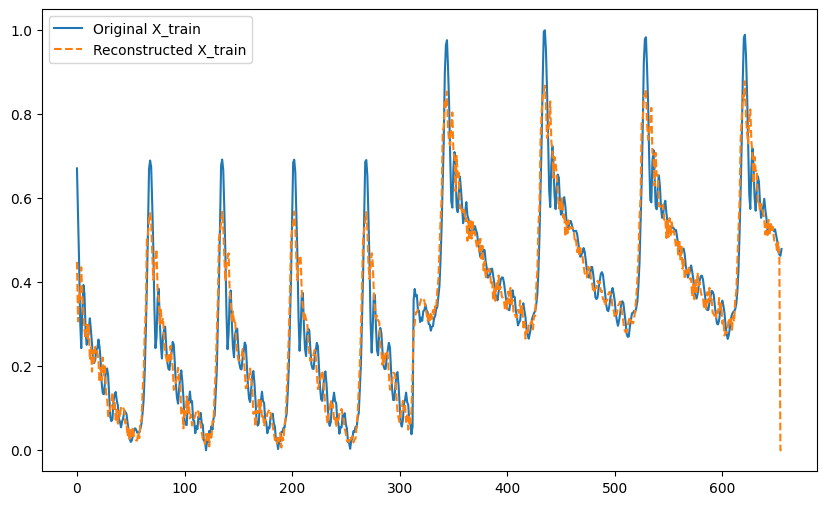

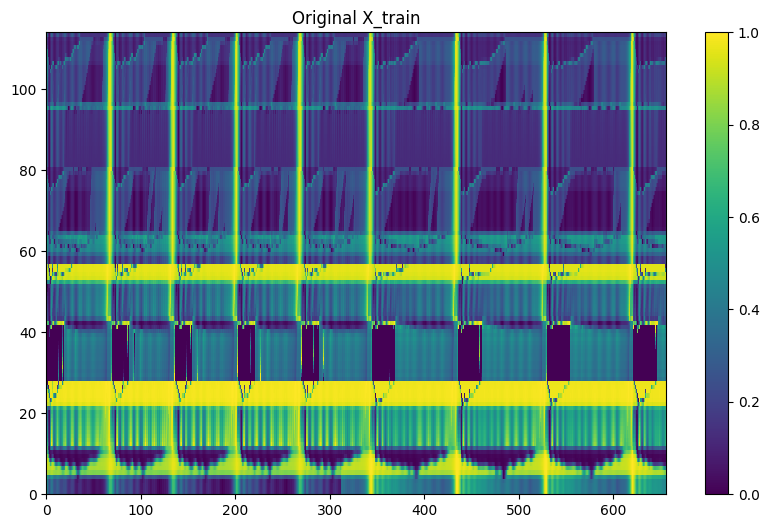

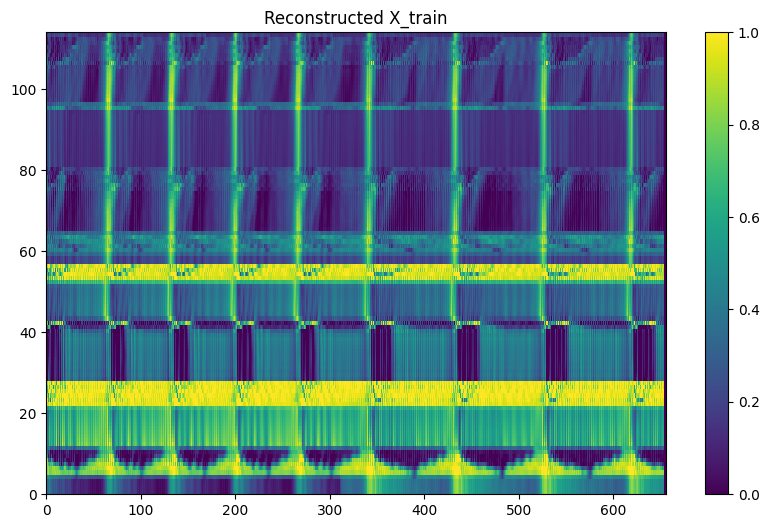

In [13]:


def dmdc(X_prime,X,U, rank_z, rank_r):
    Z = np.vstack([X,U])
    U_z,Sigma_z, Vt_z = np.linalg.svd(Z,full_matrices=False)
    V_z = Vt_z.conj().T.astype(np.complex128)
    Sinv_z = np.diag(1/(Sigma_z)).astype(np.complex128)
    if rank_z is not None:
        U_z = U_z[:,:rank_z].astype(np.complex128)
        Sinv_z = np.diag(1/(Sigma_z[:rank_z]))
        V_z = Vt_z.conj().T[:,:rank_z]
    U1_z = U_z[:X.shape[0],:]
    U2_z = U_z[X.shape[0]:,:]
    # S_z = np.diag(Sigma_z[:rank_z])
    
    # shape printing

    A = X_prime @ V_z @ Sinv_z @ U1_z.conj().T
    B =  X_prime @ V_z @ Sinv_z @ U2_z.conj().T
    # U_r,_,_ = np.linalg.svd(X_prime,full_matrices=False)
    # if rank_r is not None:
    #     U_r = U_r[:,:rank_r].astype(np.complex128)
    #shape printing
    # A_tilde = U_r.conj().T @ X_prime @ V_z @ Sinv_z @ U1_z.conj().T @ U_r
    # B_tilde = U_r.conj().T @ X_prime @ V_z @ Sinv_z @ U2_z.conj().T
    # Lambda, W = np.linalg.eig(A_tilde)
    # Lambda = np.diag(Lambda)
    # Phi = X_prime @ V_z @ Sinv_z @ U1_z.conj().T @ U_r @ W
    return {"A":A.real,
            "B":B.real,}
            # "A_tilde":A_tilde,
            # "B_tilde": B_tilde,
            # "Lambda": Lambda,
            # "Phi": Phi}

def dmdc_reconstructed(X_initial, U, A, B,T_train):
    """
    X_initial is of dimension (snapshots_X x d states)
    U_initial is of dimension (snapshots_U x d inputs)
    A is of dimension (snapshots_X * d states) x T_train
    B is of dimension (snapshots_U * d inputs) x T_train
    

    outputs:
    X_reconstructed is of dimension (snapshots_X * d states) x T_train
    """
    X_reconstructed = np.zeros((X_initial.shape[0],T_train))
    X_reconstructed[:,:d] = X_initial

    U_initial = U[:,:d]
    for i in range(d,T_train-d):

        previous_x = np.hstack([X_reconstructed[:,i-j-1] for j in range(d)]).reshape(-1,1)

        previous_u = U[:,i].reshape(-1,1)
        A_x = A @ previous_x
        B_u = B @ previous_u
        X_reconstructed[:,i] = (A_x+B_u).reshape(-1,)
    return X_reconstructed

d = delay = 2
rank_z =100
rank_r =75
X_prime =X_train[:,delay:]

print(f"Shape of X_train is : {X_train.shape}")
print(f"Shape of X_prime is : {X_prime.shape}")
if delay==1:
    X = X_train[:,:-1]
    U = Y_train[:,:-1]
else:
    i=0


    X = np.vstack([X_train[:,i:i-delay] for i in range(d)])
    U = np.vstack([Y_train[:,i:i-delay] for i in range(d)])


X_initial = X_prime[:,:delay]
U_initial = U[:,:delay]
# print(f"shape of X0: {X_initial.shape}\nshape of U0: {U_initial.shape}")
results = dmdc(X_prime,X,U, rank_z, rank_r)
A = results["A"]
B = results["B"]



X_reconstructed = dmdc_reconstructed(X_initial, U, A, B,T_train)
# Plot the original X_train and the reconstructed one
plt.figure(figsize=(10, 6))
plt.plot(X_train[0, :], label='Original X_train')
plt.plot(X_reconstructed[0, :], label='Reconstructed X_train', linestyle='--')
plt.legend()
plt.show()
# Plot the original X_train and the reconstructed one
plt.figure(figsize=(10, 6))
plt.plot(X_train[1, :], label='Original X_train')
plt.plot(X_reconstructed[1, :], label='Reconstructed X_train', linestyle='--')
plt.legend()
plt.show()
# Plot the whole original X_train and the reconstructed one
plt.figure(figsize=(10, 6))
p = plt.pcolor(X_train, cmap='viridis', vmin=0, vmax=1)
plt.colorbar(p)

plt.title('Original X_train')
plt.show()
plt.figure(figsize=(10, 6))
p = plt.pcolor(X_reconstructed, cmap='viridis', vmin=0, vmax=1)
plt.colorbar(p)

plt.title('Reconstructed X_train')
plt.show()

# whole_X_reconstructed = dmdc_reconstructed(X_initial, U, A, B,1300)

# plt.figure(figsize=(10, 6))
# p = plt.pcolor(whole_X_reconstructed, cmap='viridis', vmin=0, vmax=1)
# plt.colorbar(p)
# plt.title('Reconstructed X')
# plt.show()

In [1]:
!nvidia-smi

Wed Jun 18 13:36:15 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.144.03             Driver Version: 550.144.03     CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3090        Off |   00000000:25:00.0 Off |                  N/A |
| 76%   71C    P2            348W /  350W |   18511MiB /  24576MiB |    100%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [8]:
import numpy as np

# Parameters
n = 2           # Dimension of vectors (v_k, w_k, x_k, etc.)
d = 3           # Lag window size
N = 1000        # Total timesteps
epsilon = 0.1   # Noise level

# Generate known features (x_k, y_k, t_k) for all k
x = np.random.randn(N, n)
y = np.random.randn(N, n)
t = np.random.randn(N, n)

# Initialize v and w (partially known: v_0,...,v_d and w_0,...,w_d are given)
v = np.zeros((N, n))
w = np.zeros((N, n))
v[:d] = np.random.randn(d, n)
w[:d] = np.random.randn(d, n)

# Generate v_k and w_k for k >=d using a nonlinear function + noise
for k in range(d, N):
    # Nonlinear function of past v, w, and current x, y, t
    v[k] = 0.5 * np.sin(v[k-1]) + 0.3 * np.tanh(w[k-2]) + 0.2 * x[k] * y[k] + epsilon * np.random.randn(n)
    w[k] = 0.4 * np.cos(w[k-1]) - 0.1 * v[k-3] * t[k] + epsilon * np.random.randn(n)

# Sanity check
print("v shape:", v.shape)  # (1000, 2)
print("w shape:", w.shape)  # (1000, 2)
def create_features(v, w, x, y, t, d):
    N = len(v)
    X = []
    Y = []
    for k in range(d, N):
        # Lagged features (v_{k-1}, ..., v_{k-d}, w_{k-1}, ..., w_{k-d})
        lag_features = np.concatenate([v[k-i] for i in range(1, d+1)] + 
                                      [w[k-i] for i in range(1, d+1)])
        # Current features (x_k, y_k, t_k)
        current_features = np.concatenate([x[k], y[k], t[k]])
        # Full input vector
        X.append(np.concatenate([lag_features, current_features]))
        # Target (v_k, w_k)
        Y.append(np.concatenate([v[k], w[k]]))
    return np.array(X), np.array(Y)

X, Y = create_features(v, w, x, y, t, d)
print("X shape:", X.shape)  # (N-d, 2*d*n + 3*n) = (997, 18) for d=3, n=2
print("Y shape:", Y.shape)  # (997, 4)
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(X_train, Y_train)
Y_pred_lr = lr.predict(X_test)
mse_lr = mean_squared_error(Y_test, Y_pred_lr)
print(f"Linear Regression MSE: {mse_lr:.6f}")
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(Y_train.shape[1])  # Output layer
])
model.compile(optimizer='adam', loss='mse')
history = model.fit(X_train, Y_train, epochs=50, batch_size=32, 
                    validation_data=(X_test, Y_test), verbose=0)

Y_pred_nn = model.predict(X_test)
mse_nn = mean_squared_error(Y_test, Y_pred_nn)
print(f"Neural Network MSE: {mse_nn:.6f}")


v shape: (1000, 2)
w shape: (1000, 2)
X shape: (997, 18)
Y shape: (997, 4)
Linear Regression MSE: 0.030949


2025-06-18 13:34:59.648686: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750242899.668231  263721 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750242899.673960  263721 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1750242899.691270  263721 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1750242899.691290  263721 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1750242899.691293  263721 computation_placer.cc:177] computation placer alr

RuntimeError: Bad StatusOr access: RESOURCE_EXHAUSTED: : CUDA_ERROR_OUT_OF_MEMORY: out of memory

In [7]:
!pip install tensorflow

  Using cached tensorflow-2.19.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.1 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-manylinux2010_x86_64.whl.metadata (5.2 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-3.1.0-py3-none-any.whl.metadata (6.4 kB)
  Using cached wrapt-1.17.2-cp312-cp312-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.4 kB)
  Using cached tensorboard-2.19.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached ml_dtypes-0.5.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (21 kB)
  Using cached markdown-3.8-py3-none-any.whl.metadata (5.1 kB)
  Usin